# Sentiment Distribution Visualization

This notebook visualizes the distribution of sentiment labels in your dataset using bar charts and pie charts.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

## Load Dataset

In [2]:
file_path = './labeled_data/labeled_sentiment.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2053, 4)


,full_text,tokens,processed_text,label
0,saya tidak setuju sama kurikulum obe yang terl...,"['tuju', 'kurikulum', 'obe', 'ikutin', 'butuh'...",tuju kurikulum obe ikutin butuh industri didik...,negatif
1,obe bikin saya sebagai guru jadi lebih banyak ...,"['obe', 'bikin', 'guru', 'ngurusin', 'dokumen'...",obe bikin guru ngurusin dokumen fokus ajar,negatif
2,demi obe kampus kami sampai ngabisin dana buat...,"['obe', 'kampus', 'ngabisin', 'dana', 'konsult...",obe kampus ngabisin dana konsultan dibutuhin b...,negatif
3,obe ini hanya jargon kosong di lapangan implem...,"['obe', 'jargon', 'kosong', 'lapang', 'impleme...",obe jargon kosong lapang implementasi amburadu...,negatif
4,garagara obe waktu buat penelitian jadi berkur...,"['garagara', 'obe', 'teliti', 'kurang', 'dosen...",garagara obe teliti kurang dosen sibuk bikin d...,negatif


## Data Overview

In [3]:
# Display some statistics about the dataset
print("Columns in the dataset:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Columns in the dataset:
['full_text', 'tokens', 'processed_text', 'label']

Missing values in each column:
full_text         0
tokens            0
processed_text    0
label             0
dtype: int64


In [4]:
# Calculate label distribution
label_counts = df['label'].value_counts()
label_percentages = df['label'].value_counts(normalize=True) * 100

# Display the counts and percentages
distribution_df = pd.DataFrame({
    'Count': label_counts,
    'Percentage (%)': label_percentages.round(2)
})
distribution_df

,Count,Percentage (%)
label,,
positif,955,46.52
negatif,661,32.20
netral,437,21.29


## Bar Chart Visualization

/tmp/ipykernel_127575/3299959086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


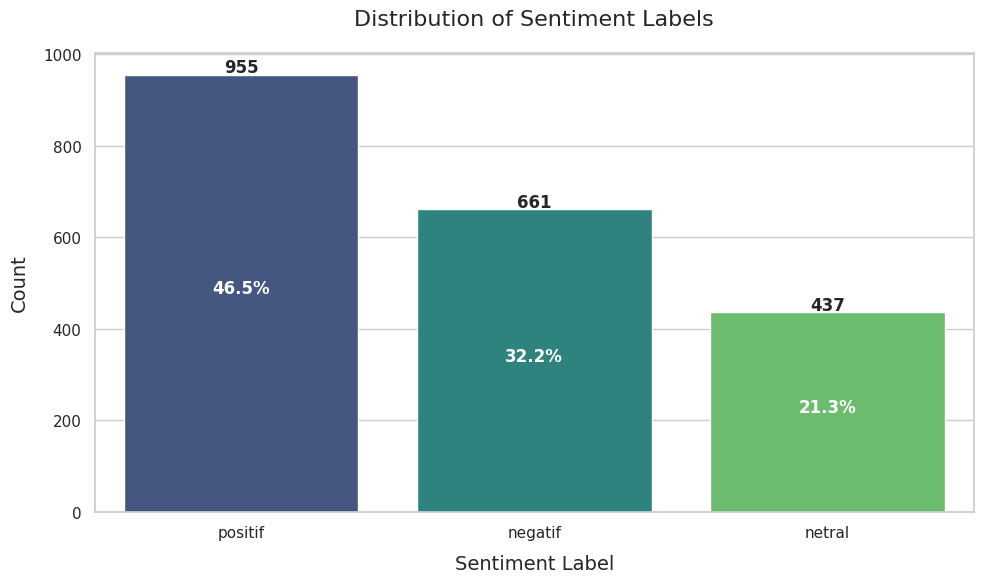

In [6]:
# Create bar chart for label distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# Add count labels on top of each bar
for i, count in enumerate(label_counts.values):
    ax.text(i, count + 5, str(count), ha='center', fontweight='bold')

# Add percentage labels
for i, (count, percentage) in enumerate(zip(label_counts.values, label_percentages.values)):
    ax.text(i, count/2, f"{percentage:.1f}%", ha='center', color='white', fontweight='bold')

# Add title and labels
plt.title('Distribution of Sentiment Labels', fontsize=16, pad=20)
plt.xlabel('Sentiment Label', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.tight_layout()

# Show the plot
plt.show()

## Pie Chart Visualization

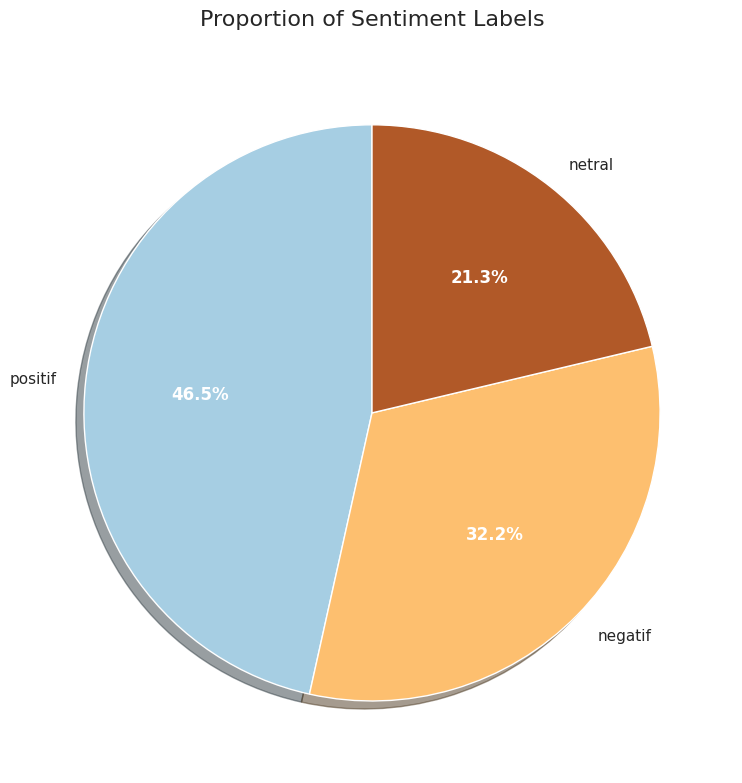

In [7]:
# Create pie chart for label distribution
plt.figure(figsize=(10, 8))

# Define custom colors
colors = plt.cm.Paired(np.linspace(0, 1, len(label_counts)))

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    label_counts.values, 
    labels=label_counts.index, 
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

# Add title
plt.title('Proportion of Sentiment Labels', fontsize=16, pad=20)
plt.tight_layout()

# Show the plot
plt.show()

## Horizontal Bar Chart with Sorted Labels

/tmp/ipykernel_127575/3358580332.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette='coolwarm', orient='h')


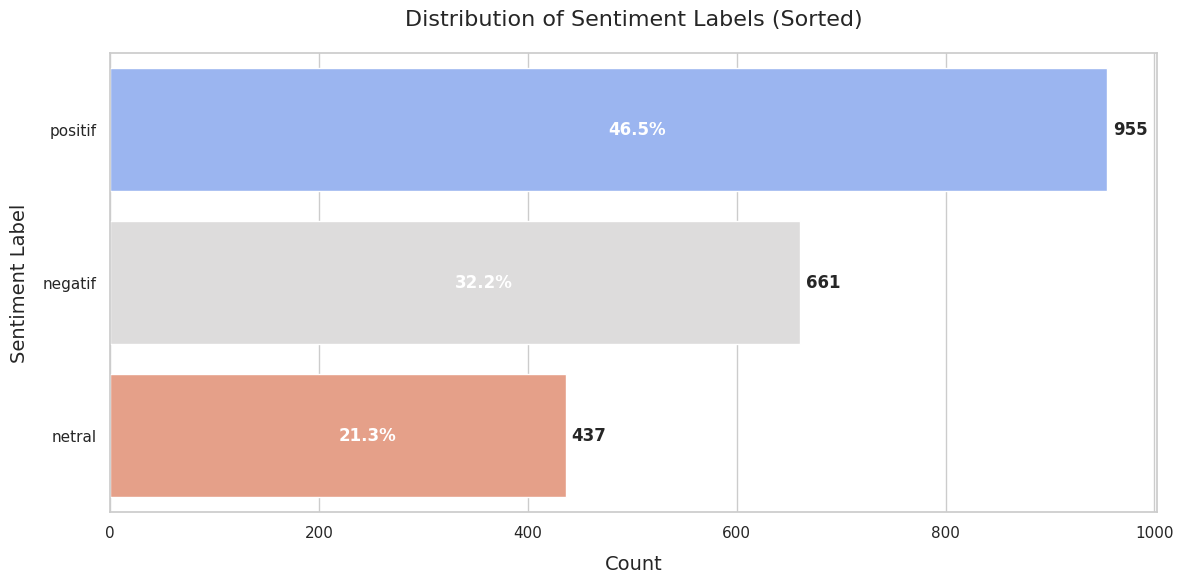

In [8]:
# Create horizontal bar chart with sorted labels for better readability
plt.figure(figsize=(12, 6))

# Sort labels by count in descending order
sorted_counts = label_counts.sort_values(ascending=False)
sorted_percentages = label_percentages[sorted_counts.index]

# Create the horizontal bar chart
ax = sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette='coolwarm', orient='h')

# Add count labels
for i, count in enumerate(sorted_counts.values):
    ax.text(count + 5, i, str(count), va='center', fontweight='bold')

# Add percentage labels inside bars
for i, (count, percentage) in enumerate(zip(sorted_counts.values, sorted_percentages.values)):
    ax.text(count/2, i, f"{percentage:.1f}%", va='center', color='white', fontweight='bold')

# Add title and labels
plt.title('Distribution of Sentiment Labels (Sorted)', fontsize=16, pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Sentiment Label', fontsize=14, labelpad=10)
plt.tight_layout()

# Show the plot
plt.show()

## Donut Chart Visualization

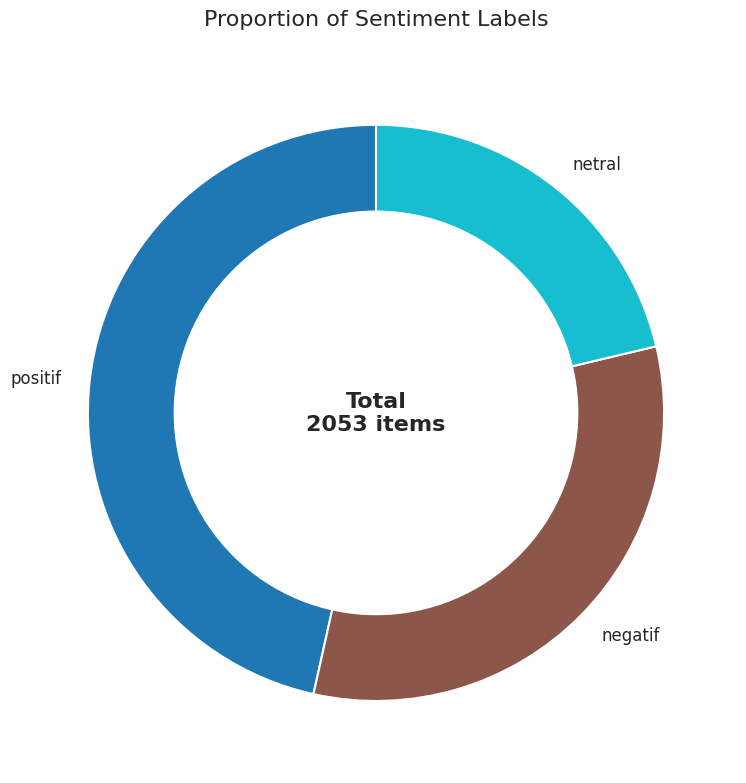

In [9]:
# Create a donut chart (alternative to pie chart)
plt.figure(figsize=(10, 8))

# Define custom colors
colors = plt.cm.tab10(np.linspace(0, 1, len(label_counts)))

# Create the donut chart
wedges, texts, autotexts = plt.pie(
    label_counts.values, 
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 12}
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

# Draw a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add count information in the center
plt.text(0, 0, f"Total\n{sum(label_counts.values)} items", ha='center', va='center', fontsize=16, fontweight='bold')

# Add title
plt.title('Proportion of Sentiment Labels', fontsize=16, pad=20)
plt.tight_layout()

# Show the plot
plt.show()